In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', 300)

In [2]:
!ls

data_logs             messages_193.log      test2_193.ipynb
logs_193              test1_193.ipynb       test2_195-193_1.ipynb
messages.log          test1_195sTa.ipynb    test2_195.ipynb


In [3]:
f= open("messages.log","r")
contents =f.read()
contents = contents.split('\n')

data_time = []

for i in range(len(contents)):
    data_time.append(contents[i][:20])

    
df = pd.DataFrame(data_time)
df.columns = ['data_time']

In [4]:
df['data_time_actual'] =  pd.to_datetime(df['data_time'],format='%Y %b %d %H:%M:%S') #, format='%d%b%Y:%H:%M:%S.%f'



In [5]:
df

,data_time,data_time_actual
0,2019 Aug 11 04:49:32,2019-08-11 04:49:32
1,2019 Aug 11 04:50:01,2019-08-11 04:50:01
2,2019 Aug 11 05:00:01,2019-08-11 05:00:01
3,2019 Aug 11 05:00:01,2019-08-11 05:00:01
4,2019 Aug 11 05:00:01,2019-08-11 05:00:01
...,...,...
124611,2020 Feb 11 02:00:01,2020-02-11 02:00:01
124612,2020 Feb 11 02:22:05,2020-02-11 02:22:05
124613,2020 Feb 11 02:30:01,2020-02-11 02:30:01
124614,2020 Feb 11 03:00:01,2020-02-11 03:00:01


In [6]:
df['secs'] = df['data_time_actual'].astype(int) / 10**9
df['datetime2'] = pd.to_datetime(df['secs'], unit='s', origin='unix') 
df

,data_time,data_time_actual,secs,datetime2
0,2019 Aug 11 04:49:32,2019-08-11 04:49:32,1.565499e+09,2019-08-11 04:49:32
1,2019 Aug 11 04:50:01,2019-08-11 04:50:01,1.565499e+09,2019-08-11 04:50:01
2,2019 Aug 11 05:00:01,2019-08-11 05:00:01,1.565500e+09,2019-08-11 05:00:01
3,2019 Aug 11 05:00:01,2019-08-11 05:00:01,1.565500e+09,2019-08-11 05:00:01
4,2019 Aug 11 05:00:01,2019-08-11 05:00:01,1.565500e+09,2019-08-11 05:00:01
...,...,...,...,...
124611,2020 Feb 11 02:00:01,2020-02-11 02:00:01,1.581386e+09,2020-02-11 02:00:01
124612,2020 Feb 11 02:22:05,2020-02-11 02:22:05,1.581388e+09,2020-02-11 02:22:05
124613,2020 Feb 11 02:30:01,2020-02-11 02:30:01,1.581388e+09,2020-02-11 02:30:01
124614,2020 Feb 11 03:00:01,2020-02-11 03:00:01,1.581390e+09,2020-02-11 03:00:01


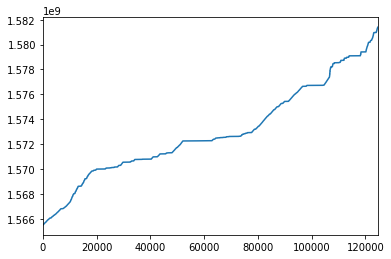

In [7]:
df['secs'].plot.line()

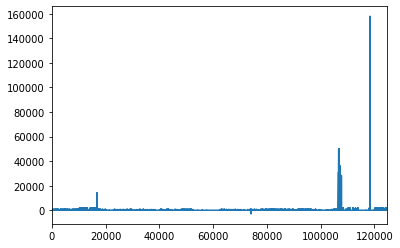

In [8]:
df['secs'].diff().plot.line()

In [9]:
df['secs'].diff().sort_values(ascending=False).reset_index(drop=True)

0         157921.0
1          49977.0
2          49970.0
3          49970.0
4          49959.0
            ...   
124611        -5.0
124612        -6.0
124613        -6.0
124614     -3000.0
124615         NaN
Name: secs, Length: 124616, dtype: float64

In [10]:
df[df.secs.diff()==157921.0]

,data_time,data_time_actual,secs,datetime2
118328,2020 Jan 19 03:26:23,2020-01-19 03:26:23,1.579404e+09,2020-01-19 03:26:23


In [11]:
contents[118328-3:118328+3]

['2020 Jan 17 07:34:21 mopbzp174195 systemd: Stopping Self Monitoring and Reporting Technology (SMART) Daemon...',
 '2020 Jan 17 07:34:21 mopbzp174195 systemd: Stopping ABRT kernel log watcher...',
 '2020 Jan 17 07:34:22 mopbzp174195 rsyslogd: [origin software="rsyslogd" swVersion="7.4.7" x-pid="845" x-info="http://www.rsyslog.com"] exiting on signal 15.',
 '2020 Jan 19 03:26:23 mopbzp174195 rsyslogd: [origin software="rsyslogd" swVersion="7.4.7" x-pid="905" x-info="http://www.rsyslog.com"] start',
 "2020 Jan 19 03:26:23 mopbzp174195 rsyslogd-2307: warning: ~ action is deprecated, consider using the 'stop' statement instead [try http://www.rsyslog.com/e/2307 ]",
 '2020 Jan 19 03:26:17 mopbzp174195 kernel: Initializing cgroup subsys cpuset']

In [12]:
df['zeros'] = [0 for i in range(len(df))]



df.loc[118328,'zeros'] = 1581564395


In [13]:
df

,data_time,data_time_actual,secs,datetime2,zeros
0,2019 Aug 11 04:49:32,2019-08-11 04:49:32,1.565499e+09,2019-08-11 04:49:32,0
1,2019 Aug 11 04:50:01,2019-08-11 04:50:01,1.565499e+09,2019-08-11 04:50:01,0
2,2019 Aug 11 05:00:01,2019-08-11 05:00:01,1.565500e+09,2019-08-11 05:00:01,0
3,2019 Aug 11 05:00:01,2019-08-11 05:00:01,1.565500e+09,2019-08-11 05:00:01,0
4,2019 Aug 11 05:00:01,2019-08-11 05:00:01,1.565500e+09,2019-08-11 05:00:01,0
...,...,...,...,...,...
124611,2020 Feb 11 02:00:01,2020-02-11 02:00:01,1.581386e+09,2020-02-11 02:00:01,0
124612,2020 Feb 11 02:22:05,2020-02-11 02:22:05,1.581388e+09,2020-02-11 02:22:05,0
124613,2020 Feb 11 02:30:01,2020-02-11 02:30:01,1.581388e+09,2020-02-11 02:30:01,0
124614,2020 Feb 11 03:00:01,2020-02-11 03:00:01,1.581390e+09,2020-02-11 03:00:01,0


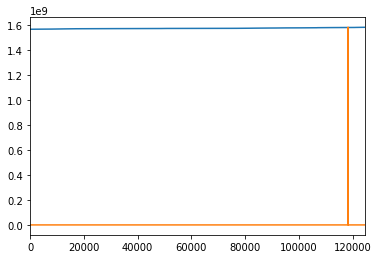

In [14]:
df['secs'].plot.line()
df['zeros'].plot.line()

In [15]:

lst1 = []
for i in range(len(df)):
    lst1.append(contents[i][20:].strip())
df['contents'] = lst1

In [16]:
df2 = df.loc[:,['data_time','secs','contents','zeros']]
df2.columns = ['data_time','secs','contents','out_class']

In [17]:
df2

,data_time,secs,contents,out_class
0,2019 Aug 11 04:49:32,1.565499e+09,mopbzp174195 rhsmd: In order for Subscription ...,0
1,2019 Aug 11 04:50:01,1.565499e+09,mopbzp174195 systemd: Started Session 9322 of ...,0
2,2019 Aug 11 05:00:01,1.565500e+09,mopbzp174195 systemd: Started Session 9324 of ...,0
3,2019 Aug 11 05:00:01,1.565500e+09,mopbzp174195 systemd: Started Session 9323 of ...,0
4,2019 Aug 11 05:00:01,1.565500e+09,mopbzp174195 crond: sendmail: fatal: parameter...,0
...,...,...,...,...
124611,2020 Feb 11 02:00:01,1.581386e+09,mopbzp174195 systemd: Started Session 1376 of ...,0
124612,2020 Feb 11 02:22:05,1.581388e+09,mopbzp174195 chronyd[981]: Selected source 162...,0
124613,2020 Feb 11 02:30:01,1.581388e+09,mopbzp174195 systemd: Started Session 1377 of ...,0
124614,2020 Feb 11 03:00:01,1.581390e+09,mopbzp174195 systemd: Started Session 1378 of ...,0


In [18]:
lst1 = []
lst2 = []
lst3 = []

for i in range(len(df2)):
    lst1.append( df2.contents[i].split(' ')[0] )
    lst2.append( df2.contents[i].split(' ')[1] )
    lst3.append(' '.join(df2.contents[i].split(' ')[2:]) )

In [19]:
df2['lst1'] = lst1
df2['lst2'] = lst2
df2['lst3'] = lst3

In [20]:
df2

,data_time,secs,contents,out_class,lst1,lst2,lst3
0,2019 Aug 11 04:49:32,1.565499e+09,mopbzp174195 rhsmd: In order for Subscription ...,0,mopbzp174195,rhsmd:,In order for Subscription Manager to provide y...
1,2019 Aug 11 04:50:01,1.565499e+09,mopbzp174195 systemd: Started Session 9322 of ...,0,mopbzp174195,systemd:,Started Session 9322 of user root.
2,2019 Aug 11 05:00:01,1.565500e+09,mopbzp174195 systemd: Started Session 9324 of ...,0,mopbzp174195,systemd:,Started Session 9324 of user cloud_user.
3,2019 Aug 11 05:00:01,1.565500e+09,mopbzp174195 systemd: Started Session 9323 of ...,0,mopbzp174195,systemd:,Started Session 9323 of user root.
4,2019 Aug 11 05:00:01,1.565500e+09,mopbzp174195 crond: sendmail: fatal: parameter...,0,mopbzp174195,crond:,sendmail: fatal: parameter inet_interfaces: no...
...,...,...,...,...,...,...,...
124611,2020 Feb 11 02:00:01,1.581386e+09,mopbzp174195 systemd: Started Session 1376 of ...,0,mopbzp174195,systemd:,Started Session 1376 of user cloud_user.
124612,2020 Feb 11 02:22:05,1.581388e+09,mopbzp174195 chronyd[981]: Selected source 162...,0,mopbzp174195,chronyd[981]:,Selected source 162.159.200.1
124613,2020 Feb 11 02:30:01,1.581388e+09,mopbzp174195 systemd: Started Session 1377 of ...,0,mopbzp174195,systemd:,Started Session 1377 of user cloud_user.
124614,2020 Feb 11 03:00:01,1.581390e+09,mopbzp174195 systemd: Started Session 1378 of ...,0,mopbzp174195,systemd:,Started Session 1378 of user cloud_user.


In [21]:
df2.lst1.sort_values().unique()

array(['mopbzp174195'], dtype=object)

In [22]:
df2.lst2.value_counts()



kernel:                                  66361
systemd:                                 35456
crond:                                    8735
systemd-logind:                           6335
rngd:                                      824
dbus[837]:                                 739
dracut:                                    443
NetworkManager[965]:                       421
dbus[9977]:                                389
gunicorn:                                  342
vmtoolsCheck:                              334
python:                                    321
containerd:                                318
yum[7548]:                                 292
journal:                                   284
dockerd:                                   275
abrt-server:                               252
systemd[1]:                                219
dbus[888]:                                 182
chronyd[867]:                              145
dbus[924]:                                 130
nohup:       

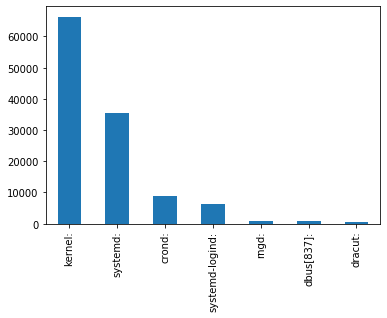

In [23]:
df2.lst2.value_counts()[:7].plot.bar()

In [24]:
len(df2.lst2.unique())



188

In [25]:
len(df2.lst3.unique())

42983

In [26]:
out_class_1 = df2[df2.out_class!=0]
out_class_1


,data_time,secs,contents,out_class,lst1,lst2,lst3
118328,2020 Jan 19 03:26:23,1.579404e+09,"mopbzp174195 rsyslogd: [origin software=""rsysl...",1581564395,mopbzp174195,rsyslogd:,"[origin software=""rsyslogd"" swVersion=""7.4.7"" ..."


In [27]:
df3 = df2.iloc[:118328,:]

In [28]:
df3[118327-300:118327]

,data_time,secs,contents,out_class,lst1,lst2,lst3
118027,2020 Jan 15 12:55:26,1.579093e+09,mopbzp174195 kernel: [30523] 1002 30523 28...,0,mopbzp174195,kernel:,[30523] 1002 30523 28297 48 12 ...
118028,2020 Jan 15 12:55:26,1.579093e+09,mopbzp174195 kernel: [30525] 1002 30525 53...,0,mopbzp174195,kernel:,[30525] 1002 30525 53976 1169 61 ...
118029,2020 Jan 15 12:55:26,1.579093e+09,mopbzp174195 kernel: [30546] 1002 30546 29...,0,mopbzp174195,kernel:,[30546] 1002 30546 29222 457 13 ...
118030,2020 Jan 15 12:55:26,1.579093e+09,mopbzp174195 kernel: [31284] 0 31284 54...,0,mopbzp174195,kernel:,[31284] 0 31284 54627 265 62 ...
118031,2020 Jan 15 12:55:26,1.579093e+09,mopbzp174195 kernel: [31285] 0 31285 126...,0,mopbzp174195,kernel:,[31285] 0 31285 126708 7661 166 ...
118032,2020 Jan 15 12:55:26,1.579093e+09,mopbzp174195 kernel: [31584] 1002 31584 31...,0,mopbzp174195,kernel:,[31584] 1002 31584 31798 1215 17 ...
118033,2020 Jan 15 12:55:26,1.579093e+09,mopbzp174195 kernel: [31816] 1002 31816 31...,0,mopbzp174195,kernel:,[31816] 1002 31816 31707 1096 17 ...
118034,2020 Jan 15 12:55:26,1.579093e+09,mopbzp174195 kernel: [63016] 1002 63016 206...,0,mopbzp174195,kernel:,[63016] 1002 63016 206373 35652 288 ...
118035,2020 Jan 15 12:55:26,1.579093e+09,mopbzp174195 kernel: [63527] 1002 63527 747...,0,mopbzp174195,kernel:,[63527] 1002 63527 747084 577128 1366 ...
118036,2020 Jan 15 12:55:26,1.579093e+09,mopbzp174195 kernel: [64304] 1002 64304 195...,0,mopbzp174195,kernel:,[64304] 1002 64304 195736 25853 265 ...


In [151]:
df_kernal = df3[df3.lst2=='kernel:']
df_kernal = df_kernal.reset_index(drop=True)

In [165]:
df_kernal.lst3[61870]

'[ pid ]   uid  tgid total_vm      rss nr_ptes swapents oom_score_adj name'

In [172]:
df_kernal = df_kernal.loc[:,['data_time','secs','lst3','out_class']]
df_kernal

,data_time,secs,lst3,out_class
0,2019 Aug 17 12:53:15,1.566046e+09,"screen invoked oom-killer: gfp_mask=0x201da, o...",0
1,2019 Aug 17 12:53:15,1.566046e+09,screen cpuset=/ mems_allowed=0,0
2,2019 Aug 17 12:53:15,1.566046e+09,CPU: 2 PID: 18065 Comm: screen Kdump: loaded T...,0
3,2019 Aug 17 12:53:15,1.566046e+09,"Hardware name: VMware, Inc. VMware Virtual Pla...",0
4,2019 Aug 17 12:53:15,1.566046e+09,Call Trace:,0
...,...,...,...,...
63687,2020 Jan 15 12:55:26,1.579093e+09,[ 8348] 1002 8348 158521 8515 56 ...,0
63688,2020 Jan 15 12:55:26,1.579093e+09,[ 8464] 1002 8452 2491178 1881300 4039 ...,0
63689,2020 Jan 15 12:55:26,1.579093e+09,[ 8681] 0 8681 26989 18 10 ...,0
63690,2020 Jan 15 12:55:26,1.579093e+09,Out of memory: Kill process 8464 (ZMQbg/1) sco...,0


In [173]:
# fine delta of tickets coming and plot

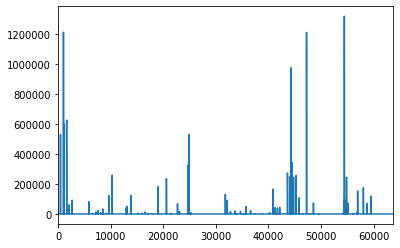

In [179]:
df_kernal.secs.diff().plot.line()

In [181]:
a = df_kernal.secs.diff()
a

0        NaN
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
63687    0.0
63688    0.0
63689    0.0
63690    0.0
63691    0.0
Name: secs, Length: 63692, dtype: float64

In [189]:
import pandas as pd
import scipy.stats

def ent(data):
    """Calculates entropy of the passed `pd.Series`
    """
    p_data = data.value_counts()           # counts occurrence of each value
    entropy = scipy.stats.entropy(p_data)  # get entropy from counts
    return entropy

In [190]:
ent(df_kernal.secs)

4.810172954443019

In [240]:
df_kernal.secs[10]

1566046395.0

In [230]:
from datetime import datetime
ts = int("1566046395")

# if you encounter a "year is out of range" error the timestamp
# may be in milliseconds, try `ts /= 1000` in that case
print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

2019-08-17 12:53:15


In [253]:
print(datetime.utcfromtimestamp(int('1566046395')).strftime('%Y-%m-%d %H:%M:%S'))

2019-08-17 12:53:15


In [266]:
test = df_kernal.secs.value_counts().sort_index()

test = pd.DataFrame(test)
test.columns = ['counts']
test['vals'] = test.index
test = test.reset_index(drop=True)
test


,counts,vals
0,214,1.566046e+09
1,211,1.566047e+09
2,1,1.566261e+09
3,1,1.566262e+09
4,1,1.566266e+09
...,...,...
434,741,1.578973e+09
435,1169,1.579093e+09
436,750,1.579093e+09
437,1121,1.579093e+09


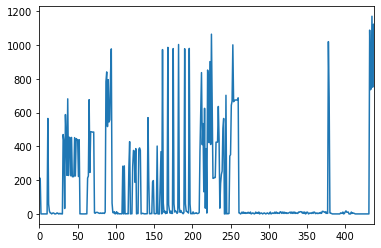

In [267]:
test.counts.plot.line()

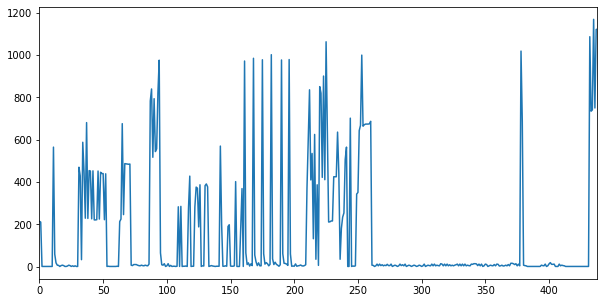

In [269]:
test.counts.rolling(window=1).mean().plot.line(figsize=(10,5))

In [278]:
test2 = df3.loc[:,['secs','lst3']]
string = ' '.join(test2.lst3.to_list())

In [279]:
#cleaning
import re
def clean_sent(sent):
    sent = sent.lower()
    special_chars2 = ['\n','\t','\\']
    for i in special_chars2:
        sent = sent.replace(i,' ')
    special_chars = '~!@#$%^&*()_+{}[]:;"<>?,./\|`-='
    for i in special_chars:
        sent = sent.replace(i,' ')
    special_chars3 = "'"
    for i in special_chars3:
        sent = sent.replace(i,' ')
    special_chars4 = '"'
    for i in special_chars3:
        sent = sent.replace(i,' ')

        
    sent = re.sub(' +', ' ',sent)
    
    return sent



In [280]:
string1 = clean_sent(string)

In [307]:
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english')) 
  
list_words = string1.split(' ')
list_words = [w for w in list_words if not w in stop_words] 


list_words = pd.DataFrame(list_words)
list_words.columns = ['words']
list_words = pd.DataFrame(list_words.words.value_counts())
list_words.columns = ['counts']
list_words['words'] = list_words.index
list_words = list_words.reset_index(drop=True)
list_words

,counts,words
0,112790,0
1,41507,user
2,35078,session
3,29980,started
4,22584,1002
...,...,...
32248,1,5733
32249,1,17122
32250,1,8926
32251,1,18386


In [320]:
drop_index = []
#df.drop(df.index[2])
for i in range(len(list_words)):
    if list_words.words[i].isdigit():
        drop_index.append(i)
list_words2 = list_words.drop(list_words.index[drop_index]).reset_index(drop=True)   
    

In [321]:
list_words2

,counts,words
0,41507,user
1,35078,session
2,29980,started
3,21493,root
4,10528,0kb
...,...,...
6419,1,70016kb
6420,1,3124kb
6421,1,ffffffff974d67ab
6422,1,kubectl


In [330]:
list_words3 = list_words2[list_words2.counts>2].reset_index(drop=True)
list_words3

,counts,words
0,41507,user
1,35078,session
2,29980,started
3,21493,root
4,10528,0kb
...,...,...
3773,3,73132kb
3774,3,536kb
3775,3,20ghz
3776,3,7796kb


In [323]:
list_words3.counts[list_words3.words=='user'][0]

41507

In [369]:
ent_lst= []
mean_lst = []

for i in range(0,len(test2)):
    if i%1000==0:
        print(i)
    words = clean_sent(test2.lst3[i]).split(' ')
    count_array = []

    for word in words:
        if word in list_words3.words.to_list():
            count_array.append(list_words3.counts[list_words3.words==word].to_list()[0])
    if len(count_array)>1:
        ent_lst.append( ent(pd.Series(count_array)) )
        mean_lst.append (sum(count_array)/len(count_array) )
    else:
        ent_lst.append( 0 )
        mean_lst.append ( 0 )        
    
test2['mean'] = mean_lst 
test2['ent'] =  ent_lst 

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000


In [381]:
test2.columns = ['secs','lst3','ent','means']
test2

,secs,lst3,ent,means
0,1.565499e+09,In order for Subscription Manager to provide y...,2.625048,619.052632
1,1.565499e+09,Started Session 9322 of user root.,1.386294,32014.500000
2,1.565500e+09,Started Session 9324 of user cloud_user.,1.332179,31231.600000
3,1.565500e+09,Started Session 9323 of user root.,1.386294,32014.500000
4,1.565500e+09,sendmail: fatal: parameter inet_interfaces: no...,1.906155,8977.375000
...,...,...,...,...
118323,1.579246e+09,Stopping Modem Manager...,1.098612,232.000000
118324,1.579246e+09,Stopping RPC bind service...,1.386294,590.500000
118325,1.579246e+09,Stopping Self Monitoring and Reporting Technol...,1.747868,276.571429
118326,1.579246e+09,Stopping ABRT kernel log watcher...,1.609438,575.800000


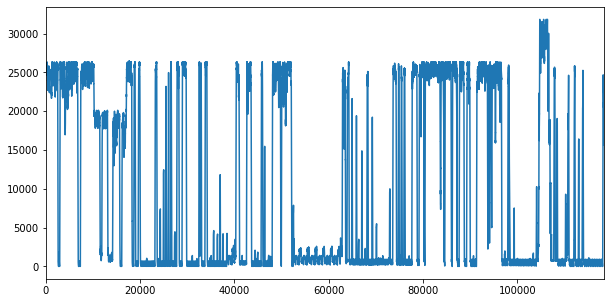

In [384]:
test2.means.rolling(window=100).mean().plot.line(figsize=(10,5))

In [398]:
test3 = df3
test3 = test3.loc[:,['secs','lst2']]
test3

,secs,lst2
0,1.565499e+09,rhsmd:
1,1.565499e+09,systemd:
2,1.565500e+09,systemd:
3,1.565500e+09,systemd:
4,1.565500e+09,crond:
...,...,...
118323,1.579246e+09,systemd:
118324,1.579246e+09,systemd:
118325,1.579246e+09,systemd:
118326,1.579246e+09,systemd:


In [413]:
secs_lst = test3.secs.unique()
secs_lst

array([1.56549897e+09, 1.56549900e+09, 1.56549960e+09, ...,
       1.57924620e+09, 1.57924646e+09, 1.57924646e+09])

In [436]:
total_systems = []
unique_systems = []
secs = []
for i in secs_lst:
    vals = test3[test3.secs==i].lst2.to_list()
    
    secs.append(i)
    total_systems.append(len(vals))
    unique_systems.append(len(list(set(vals))))
    


In [439]:
test4 = pd.DataFrame(secs)
test4.columns = ['secs']
test4['total_systems'] = total_systems
test4['unique_systems'] = unique_systems


test4


,secs,total_systems,unique_systems
0,1.565499e+09,1,1
1,1.565499e+09,1,1
2,1.565500e+09,3,2
3,1.565500e+09,1,1
4,1.565500e+09,1,1
...,...,...,...
31187,1.579243e+09,1,1
31188,1.579244e+09,1,1
31189,1.579246e+09,1,1
31190,1.579246e+09,41,3


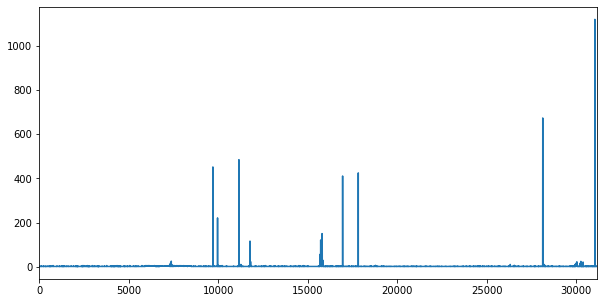

In [465]:
test4.total_systems.rolling(window=5).median().plot.line(figsize=(10,5))

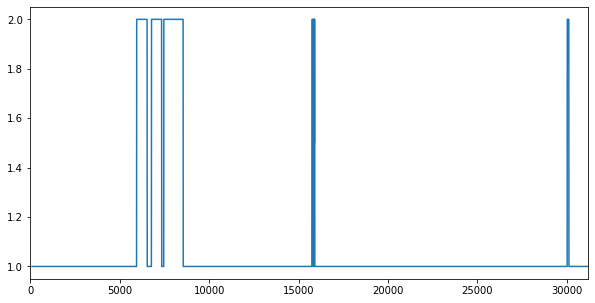

In [455]:
test4.unique_systems.rolling(window=100).median().plot.line(figsize=(10,5))

In [466]:
# train on first few months as normal ans test on last month

In [467]:
# one class training

# one class for 
# input = timestamps difference as input and predicting if timestamps are normal or abnormal
# input = text(contents), timestamp and output is normal or not



In [468]:
df3

,data_time,secs,contents,out_class,lst1,lst2,lst3
0,2019 Aug 11 04:49:32,1.565499e+09,mopbzp174195 rhsmd: In order for Subscription ...,0,mopbzp174195,rhsmd:,In order for Subscription Manager to provide y...
1,2019 Aug 11 04:50:01,1.565499e+09,mopbzp174195 systemd: Started Session 9322 of ...,0,mopbzp174195,systemd:,Started Session 9322 of user root.
2,2019 Aug 11 05:00:01,1.565500e+09,mopbzp174195 systemd: Started Session 9324 of ...,0,mopbzp174195,systemd:,Started Session 9324 of user cloud_user.
3,2019 Aug 11 05:00:01,1.565500e+09,mopbzp174195 systemd: Started Session 9323 of ...,0,mopbzp174195,systemd:,Started Session 9323 of user root.
4,2019 Aug 11 05:00:01,1.565500e+09,mopbzp174195 crond: sendmail: fatal: parameter...,0,mopbzp174195,crond:,sendmail: fatal: parameter inet_interfaces: no...
...,...,...,...,...,...,...,...
118323,2020 Jan 17 07:34:21,1.579246e+09,mopbzp174195 systemd: Stopping Modem Manager...,0,mopbzp174195,systemd:,Stopping Modem Manager...
118324,2020 Jan 17 07:34:21,1.579246e+09,mopbzp174195 systemd: Stopping RPC bind servic...,0,mopbzp174195,systemd:,Stopping RPC bind service...
118325,2020 Jan 17 07:34:21,1.579246e+09,mopbzp174195 systemd: Stopping Self Monitoring...,0,mopbzp174195,systemd:,Stopping Self Monitoring and Reporting Technol...
118326,2020 Jan 17 07:34:21,1.579246e+09,mopbzp174195 systemd: Stopping ABRT kernel log...,0,mopbzp174195,systemd:,Stopping ABRT kernel log watcher...


In [29]:
#  input = timestamps difference as input and predicting if timestamps are normal or abnormal
df4 = df3.loc[:,['secs']]    
df4['diff1'] = df4.secs.diff()
df4['diff2'] = df4.diff1.diff()
df4 = df4.iloc[2:,:]
df4['out_class'] = [0] * len(df4)
df4 = df4.reset_index(drop=True)
df4

,secs,diff1,diff2,out_class
0,1.565500e+09,600.0,571.0,0
1,1.565500e+09,0.0,-600.0,0
2,1.565500e+09,0.0,0.0,0
3,1.565500e+09,60.0,60.0,0
4,1.565500e+09,79.0,19.0,0
...,...,...,...,...
118321,1.579246e+09,0.0,0.0,0
118322,1.579246e+09,0.0,0.0,0
118323,1.579246e+09,0.0,0.0,0
118324,1.579246e+09,0.0,0.0,0


In [524]:
X=[]
y=[]
for i in range(len(df4)):
    X.append( ([df4.loc[i,'diff1'],df4.loc[i,'diff2']]))
    y.append(df4.loc[i,'out_class'])
    

In [527]:
X = np.asarray(X)
X

array([[ 600.,  571.],
       [   0., -600.],
       [   0.,    0.],
       ...,
       [   0.,    0.],
       [   0.,    0.],
       [   1.,    1.]])

In [528]:
y = np.asarray(y)
y

array([0, 0, 0, ..., 0, 0, 0])

Counter({0: 118326})


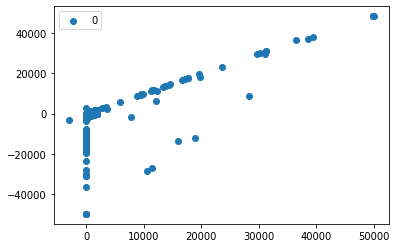

In [530]:

# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset


#X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)


# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [532]:
# one-class svm for imbalanced binary classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM
# generate dataset

#trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
trainX = X[:95000]
testX = X[95000:]
trainy = y[:95000]
testy = y[95000:]


# define outlier detection model
model = OneClassSVM(gamma='scale', nu=0.01)
# fit on majority class
trainX = trainX[trainy==0]
model.fit(trainX)
# detect outliers in the test set
yhat = model.predict(testX)
# mark inliers 1, outliers -1
testy[testy == 1] = -1
testy[testy == 0] = 1
# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.000


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


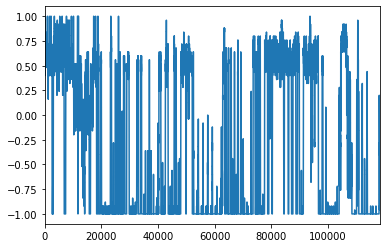

In [538]:
o =model.predict(X)
o[o == 0] = -1
o[o == 1] = 1

pd.DataFrame(o).iloc[:,0].rolling(window=50).mean().plot.line()

In [539]:
# local outlier factor for imbalanced classification
from numpy import vstack
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.neighbors import LocalOutlierFactor

# make a prediction with a lof model
def lof_predict(model, trainX, testX):
	# create one large dataset
	composite = vstack((trainX, testX))
	# make prediction on composite dataset
	yhat = model.fit_predict(composite)
	# return just the predictions on the test set
	return yhat[len(trainX):]

# generate dataset

# split into train/test sets
#trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# define outlier detection model
model = LocalOutlierFactor(contamination=0.01)
# get examples for just the majority class
trainX = trainX[trainy==0]
# detect outliers in the test set
yhat = lof_predict(model, trainX, testX)
# mark inliers 1, outliers -1
testy[testy == 1] = -1
testy[testy == 0] = 1
# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.021


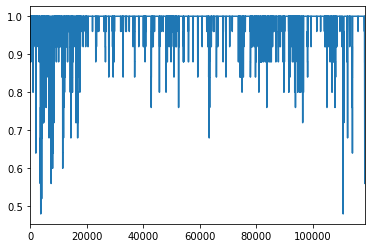

In [541]:
o =lof_predict(model, X, X)
o[o == 0] = -1
o[o == 1] = 1

pd.DataFrame(o).iloc[:,0].rolling(window=50).mean().plot.line()

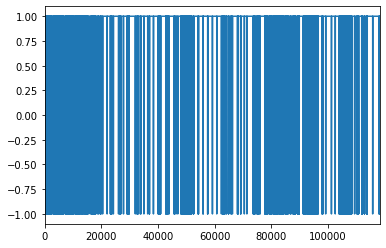

In [542]:

pd.DataFrame(o).iloc[:,0].plot.line()

In [543]:
# tranin by creating features of moving window... e.g sr no 1,2,3,4,5,6,7 will bre treated as 
#123 0
#234 0 
#345 0
#567 0



In [30]:
df5 = df4.loc[:,['diff1','out_class']]
df5

,diff1,out_class
0,600.0,0
1,0.0,0
2,0.0,0
3,60.0,0
4,79.0,0
...,...,...
118321,0.0,0
118322,0.0,0
118323,0.0,0
118324,0.0,0


In [31]:
lst = df5.diff1.to_list()




window_size = 40
stride = 5

data = []

ii=0
for i in range(len(lst)):
    x = lst[ii:ii+window_size]
    data.append(x)
    ii=ii+stride

data  =pd.DataFrame(data)
data


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,600.0,0.0,0.0,60.0,79.0,461.0,600.0,600.0,0.0,0.0,...,576.0,600.0,0.0,0.0,600.0,600.0,600.0,0.0,0.0,60.0
1,461.0,600.0,600.0,0.0,0.0,601.0,599.0,600.0,0.0,0.0,...,600.0,600.0,0.0,0.0,60.0,163.0,377.0,600.0,505.0,0.0
2,601.0,599.0,600.0,0.0,0.0,60.0,356.0,184.0,600.0,600.0,...,163.0,377.0,600.0,505.0,0.0,0.0,3.0,0.0,13.0,2.0
3,60.0,356.0,184.0,600.0,600.0,0.0,0.0,601.0,599.0,600.0,...,0.0,3.0,0.0,13.0,2.0,0.0,77.0,0.0,0.0,600.0
4,0.0,0.0,601.0,599.0,600.0,0.0,0.0,60.0,540.0,24.0,...,0.0,77.0,0.0,0.0,600.0,600.0,600.0,0.0,0.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
data1 = data.dropna(how='all')
data1

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,600.0,0.0,0.0,60.0,79.0,461.0,600.0,600.0,0.0,0.0,...,576.0,600.0,0.0,0.0,600.0,600.0,600.0,0.0,0.0,60.0
1,461.0,600.0,600.0,0.0,0.0,601.0,599.0,600.0,0.0,0.0,...,600.0,600.0,0.0,0.0,60.0,163.0,377.0,600.0,505.0,0.0
2,601.0,599.0,600.0,0.0,0.0,60.0,356.0,184.0,600.0,600.0,...,163.0,377.0,600.0,505.0,0.0,0.0,3.0,0.0,13.0,2.0
3,60.0,356.0,184.0,600.0,600.0,0.0,0.0,601.0,599.0,600.0,...,0.0,3.0,0.0,13.0,2.0,0.0,77.0,0.0,0.0,600.0
4,0.0,0.0,601.0,599.0,600.0,0.0,0.0,60.0,540.0,24.0,...,0.0,77.0,0.0,0.0,600.0,600.0,600.0,0.0,0.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23664,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
data1 = data1.iloc[:23658,:]
data1

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,600.0,0.0,0.0,60.0,79.0,461.0,600.0,600.0,0.0,0.0,...,576.0,600.0,0.0,0.0,600.0,600.0,600.0,0.0,0.0,60.0
1,461.0,600.0,600.0,0.0,0.0,601.0,599.0,600.0,0.0,0.0,...,600.0,600.0,0.0,0.0,60.0,163.0,377.0,600.0,505.0,0.0
2,601.0,599.0,600.0,0.0,0.0,60.0,356.0,184.0,600.0,600.0,...,163.0,377.0,600.0,505.0,0.0,0.0,3.0,0.0,13.0,2.0
3,60.0,356.0,184.0,600.0,600.0,0.0,0.0,601.0,599.0,600.0,...,0.0,3.0,0.0,13.0,2.0,0.0,77.0,0.0,0.0,600.0
4,0.0,0.0,601.0,599.0,600.0,0.0,0.0,60.0,540.0,24.0,...,0.0,77.0,0.0,0.0,600.0,600.0,600.0,0.0,0.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23653,1800.0,1800.0,1684.0,0.0,0.0,116.0,635.0,0.0,0.0,1165.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23654,116.0,635.0,0.0,0.0,1165.0,1800.0,1800.0,1800.0,1800.0,1800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23655,1800.0,1800.0,1800.0,1800.0,1800.0,1801.0,1799.0,1800.0,1800.0,260.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23656,1801.0,1799.0,1800.0,1800.0,260.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
X=[]
y=[]
for i in range(len(data1)):
    X.append( (data1.loc[i,:].to_list()))
    

In [36]:
X = np.asarray(X)
y = np.asarray([0] * len(X))

In [37]:
len(X)

23658

In [39]:
# one-class svm for imbalanced binary classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM
# generate dataset

#trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
trainX = X[:15000]
testX = X[15000:]
trainy = y[:15000]
testy = y[15000:]


# define outlier detection model
model = OneClassSVM(gamma='scale', nu=0.01)
# fit on majority class
trainX = trainX[trainy==0]
model.fit(trainX)
# detect outliers in the test set
yhat = model.predict(testX)
# mark inliers 1, outliers -1
testy[testy == 1] = -1
testy[testy == 0] = 1
# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.134


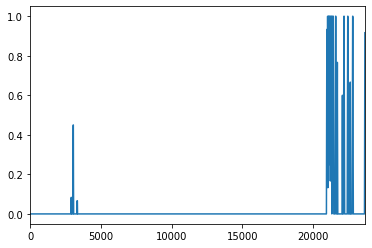

In [40]:
o =model.predict(X)
o[o >= 0] = 0
o[o < 0] = 1

pd.DataFrame(o).iloc[:,0].rolling(window=30).median().rolling(window=30).mean().plot.line()

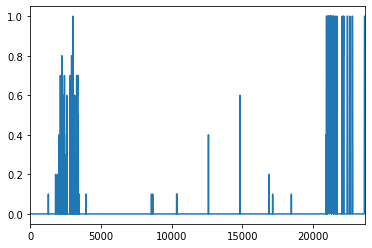

In [41]:
pd.DataFrame(o).iloc[:,0].rolling(window=10).mean().plot.line()

In [24]:
#Training on 195

f= open("messages_195.log","r")
contents =f.read()
contents = contents.split('\n')

data_time = []

for i in range(len(contents)):
    data_time.append(contents[i][:20])

    
df = pd.DataFrame(data_time)
df.columns = ['data_time']

df['data_time_actual'] =  pd.to_datetime(df['data_time'],format='%Y %b %d %H:%M:%S') #, format='%d%b%Y:%H:%M:%S.%f'



df['secs'] = df['data_time_actual'].astype(int) / 10**9
df['datetime2'] = pd.to_datetime(df['secs'], unit='s', origin='unix') 
df




,data_time,data_time_actual,secs,datetime2
0,2019 Mar 24 07:50:01,2019-03-24 07:50:01,1.553414e+09,2019-03-24 07:50:01
1,2019 Mar 24 08:00:01,2019-03-24 08:00:01,1.553414e+09,2019-03-24 08:00:01
2,2019 Mar 24 08:01:01,2019-03-24 08:01:01,1.553414e+09,2019-03-24 08:01:01
3,2019 Mar 24 08:09:51,2019-03-24 08:09:51,1.553415e+09,2019-03-24 08:09:51
4,2019 Mar 24 08:10:01,2019-03-24 08:10:01,1.553415e+09,2019-03-24 08:10:01
...,...,...,...,...
88862,2020 Feb 13 02:59:49,2020-02-13 02:59:49,1.581563e+09,2020-02-13 02:59:49
88863,2020 Feb 13 03:08:46,2020-02-13 03:08:46,1.581563e+09,2020-02-13 03:08:46
88864,2020 Feb 13 03:26:35,2020-02-13 03:26:35,1.581564e+09,2020-02-13 03:26:35
88865,2020 Feb 13 03:26:35,2020-02-13 03:26:35,1.581564e+09,2020-02-13 03:26:35


In [30]:
lst = df.secs.diff().to_list()
lst = lst[1:]



window_size = 40
stride = 5

data = []

ii=0
for i in range(len(lst)):
    x = lst[ii:ii+window_size]
    data.append(x)
    ii=ii+stride


data  =pd.DataFrame(data)

data1 = data.dropna(how='all')

data1 = data1.iloc[:len(data1)-10,:]

data1

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,600.0,60.0,530.0,10.0,600.0,600.0,600.0,600.0,600.0,60.0,...,600.0,600.0,600.0,60.0,480.0,60.0,600.0,600.0,600.0,600.0
1,600.0,600.0,600.0,600.0,60.0,309.0,231.0,600.0,600.0,600.0,...,60.0,600.0,600.0,600.0,600.0,600.0,61.0,480.0,59.0,601.0
2,309.0,231.0,600.0,600.0,600.0,600.0,600.0,60.0,540.0,401.0,...,600.0,61.0,480.0,59.0,601.0,599.0,600.0,600.0,47.0,9.0
3,600.0,600.0,60.0,540.0,401.0,199.0,600.0,600.0,600.0,600.0,...,599.0,600.0,600.0,47.0,9.0,0.0,0.0,0.0,0.0,0.0
4,199.0,600.0,600.0,600.0,600.0,60.0,540.0,401.0,199.0,600.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17759,3501.0,3762.0,3619.0,2836.0,3497.0,0.0,26.0,198.0,0.0,0.0,...,3215.0,1579.0,1780.0,3811.0,3874.0,2945.0,201.0,3522.0,3615.0,2431.0
17760,0.0,26.0,198.0,0.0,0.0,587.0,0.0,0.0,3577.0,2807.0,...,2945.0,201.0,3522.0,3615.0,2431.0,1136.0,4395.0,3421.0,3462.0,3757.0
17761,587.0,0.0,0.0,3577.0,2807.0,0.0,0.0,125.0,322.0,3738.0,...,1136.0,4395.0,3421.0,3462.0,3757.0,3653.0,3056.0,2423.0,0.0,0.0
17762,0.0,0.0,125.0,322.0,3738.0,3519.0,376.0,0.0,0.0,201.0,...,3653.0,3056.0,2423.0,0.0,0.0,1711.0,1495.0,0.0,0.0,318.0


In [32]:
X=[]

for i in range(len(data1)):
    X.append( (data1.loc[i,:].to_list()))

X = np.asarray(X)
y = np.asarray([0] * len(X))        

In [ ]:
#training one class svm

# one-class svm for imbalanced binary classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM
# generate dataset

#trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
trainX = X[:15000]
testX = X[15000:]
trainy = y[:15000]
testy = y[15000:]


# define outlier detection model
model = OneClassSVM(gamma='scale', nu=0.01)
# fit on majority class
trainX = trainX[trainy==0]
model.fit(trainX)
# detect outliers in the test set
yhat = model.predict(testX)
# mark inliers 1, outliers -1
testy[testy == 1] = -1
testy[testy == 0] = 1
# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

In [22]:
o =model.predict(X)
o[o >= 0] = 0
o[o < 0] = 1

pd.DataFrame(o).iloc[:,0].rolling(window=30).median().rolling(window=30).mean().plot.line()

In [3]:

# testing on 193

f= open("messages_193.log","r")
contents =f.read()
contents = contents.split('\n')

data_time = []

for i in range(len(contents)):
    data_time.append(contents[i][:20])

    
dfx = pd.DataFrame(data_time)
dfx.columns = ['data_time']

dfx['data_time_actual'] =  pd.to_datetime(dfx['data_time'],format='%Y %b %d %H:%M:%S') #, format='%d%b%Y:%H:%M:%S.%f'



dfx['secs'] = dfx['data_time_actual'].astype(int) / 10**9
dfx['datetime2'] = pd.to_datetime(dfx['secs'], unit='s', origin='unix') 
dfx

,data_time,data_time_actual,secs,datetime2
0,2019 Mar 24 07:50:01,2019-03-24 07:50:01,1.553414e+09,2019-03-24 07:50:01
1,2019 Mar 24 08:00:01,2019-03-24 08:00:01,1.553414e+09,2019-03-24 08:00:01
2,2019 Mar 24 08:01:01,2019-03-24 08:01:01,1.553414e+09,2019-03-24 08:01:01
3,2019 Mar 24 08:09:51,2019-03-24 08:09:51,1.553415e+09,2019-03-24 08:09:51
4,2019 Mar 24 08:10:01,2019-03-24 08:10:01,1.553415e+09,2019-03-24 08:10:01
...,...,...,...,...
88862,2020 Feb 13 02:59:49,2020-02-13 02:59:49,1.581563e+09,2020-02-13 02:59:49
88863,2020 Feb 13 03:08:46,2020-02-13 03:08:46,1.581563e+09,2020-02-13 03:08:46
88864,2020 Feb 13 03:26:35,2020-02-13 03:26:35,1.581564e+09,2020-02-13 03:26:35
88865,2020 Feb 13 03:26:35,2020-02-13 03:26:35,1.581564e+09,2020-02-13 03:26:35


In [16]:
lst = dfx.secs.diff().to_list()
lst = lst[1:]



window_size = 40
stride = 5

datax = []

ii=0
for i in range(len(lst)):
    x = lst[ii:ii+window_size]
    datax.append(x)
    ii=ii+stride

#datax  =pd.DataFrame(datax)
#datax
datax  =pd.DataFrame(datax)


datax1 = datax.dropna(how='all')

datax1 = datax1[:17764]

datax1

In [ ]:
o =model.predict(X)
o[o >= 0] = 0
o[o < 0] = 1

pd.DataFrame(o).iloc[:,0].rolling(window=30).median().rolling(window=30).mean().plot.line()